# Converter : Symbolic Music representations


In [1]:
from midiConverter import Converter
from Visualizer import Visualizer
from MidiLikeSeq import MidiLikeSeq
from NoteTupleSeq import NoteTupleSeq
import matplotlib.pyplot as plt

import pandas as pd
import pretty_midi as pm
from note_seq.protobuf import music_pb2
import note_seq
import glob

/home/erik/.local/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/erik/.local/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


## Midi to Midi-Like
Midi file used: 

In [2]:
midi_file = "monophonic-and-pauses.mid"
path = "midi-files-test/"
path_save = "generated-midi-files/"

In [3]:
c = Converter()
midi_like_seq = c.midi2midi_like(path + midi_file)
midi_like_seq.show()

seq = c.midi_like2seq(midi_like_seq)
note_seq.sequence_proto_to_midi_file(seq,path_save + midi_file[:-4]+ "_midi_like.mid")


SET_VELOCITY<50.0>
NOTE_ON<45>
TIME_SHIFT<0.1363635>
NOTE_OFF<45.0>
NOTE_ON<45>
TIME_SHIFT<0.1363635>
NOTE_OFF<45.0>
NOTE_ON<45>
TIME_SHIFT<0.13636350000000003>
NOTE_OFF<45.0>
NOTE_ON<46>
TIME_SHIFT<0.13636349999999997>
NOTE_OFF<46.0>
NOTE_ON<45>
TIME_SHIFT<0.13636350000000008>
NOTE_OFF<45.0>
NOTE_ON<45>
TIME_SHIFT<0.13636349999999997>
NOTE_OFF<45.0>
TIME_SHIFT<0.13636349999999997>
NOTE_ON<45>
TIME_SHIFT<0.13636349999999997>
NOTE_OFF<45.0>
NOTE_ON<45>
TIME_SHIFT<0.13636350000000008>
NOTE_OFF<45.0>
TIME_SHIFT<0.13636350000000008>
NOTE_ON<45>
TIME_SHIFT<0.13636349999999986>
NOTE_OFF<45.0>
NOTE_ON<45>
TIME_SHIFT<0.13636350000000008>
NOTE_OFF<45.0>
NOTE_ON<46>
TIME_SHIFT<0.13636350000000008>
NOTE_OFF<46.0>
NOTE_ON<45>
TIME_SHIFT<0.13636349999999986>
NOTE_OFF<45.0>
NOTE_ON<45>
TIME_SHIFT<0.13636350000000008>
NOTE_OFF<45.0>
NOTE_ON<45>
TIME_SHIFT<0.13636349999999986>
NOTE_OFF<45.0>


Number of instruments :  1


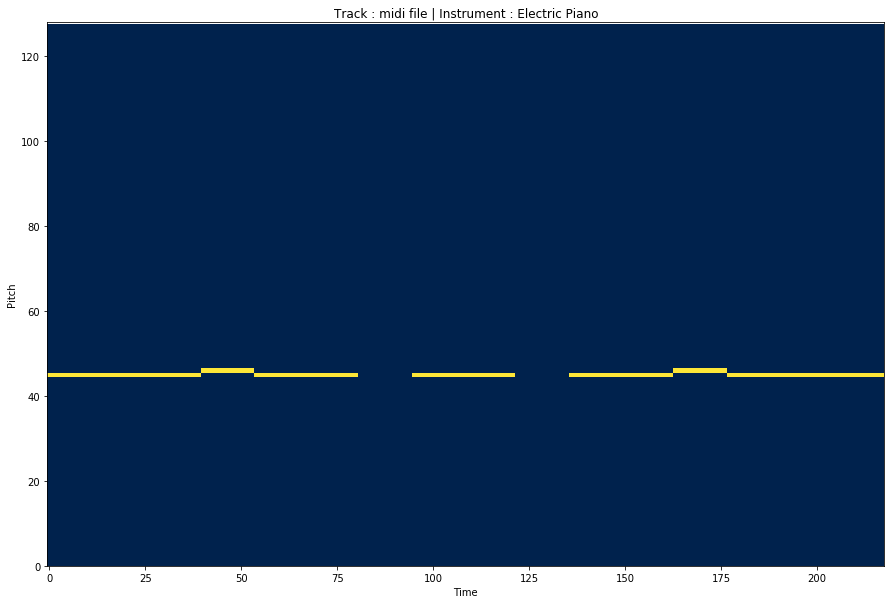

In [4]:
midi_data = pm.PrettyMIDI(path + midi_file)
v1 = Visualizer(midi_data)
v1.show_midi_notes(DEBUG = True)

Number of instruments :  1


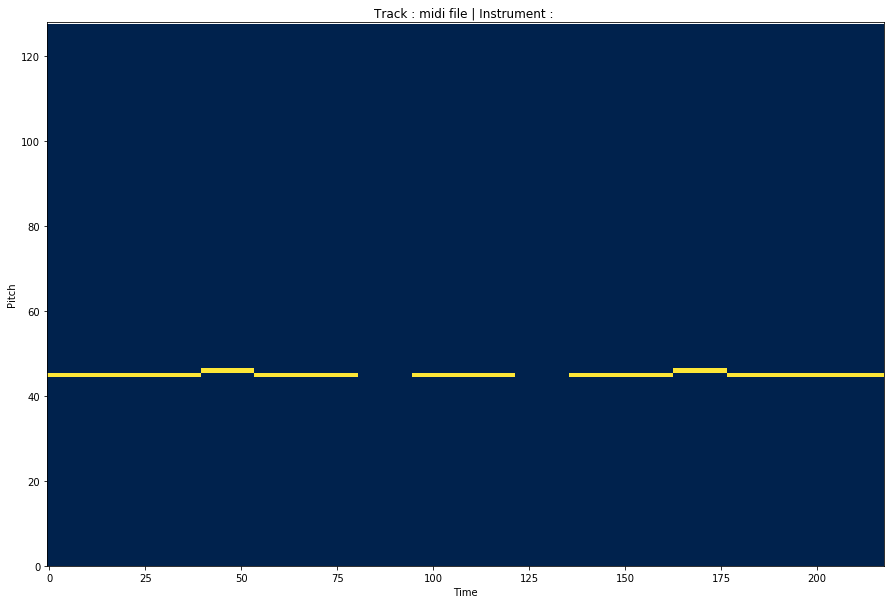

In [5]:

midi_data = pm.PrettyMIDI(path_save + midi_file[:-4]+"_midi_like.mid")
v2 = Visualizer(midi_data)

v2.show_midi_notes(DEBUG = True)


### Comparison between original and reconstruct : 

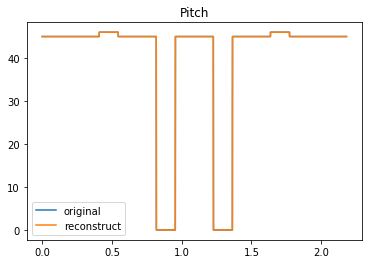

In [6]:


t1, p1, l1 = v1.get_time_f0_loudness()
t2, p2, l2 = v2.get_time_f0_loudness()

plt.plot(t1, p1[0], label = "original")
plt.plot(t2, p2[0], label = "reconstruct")
plt.title("Pitch")
plt.legend()
plt.show()

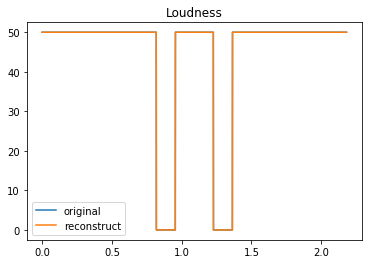

In [7]:
plt.plot(t1, l1[0], label = "original")
plt.plot(t2, l2[0], label = "reconstruct")
plt.title("Loudness")
plt.legend()
plt.show()

## Midi to Note tuple :


Converting midi to note tuple : 

In [8]:
c = Converter()

note_tuple_seq = c.midi2note_tuple(path + midi_file)
note_tuple_seq.save("note-tuples.txt")
note_tuple_seq


(0,0,45,50,0,13)
(0,13,45,50,0,13)
(0,13,45,50,0,13)
(0,13,46,50,0,13)
(0,13,45,50,0,13)
(0,13,45,50,0,13)
(0,27,45,50,0,13)
(0,13,45,50,0,13)
(0,27,45,50,0,13)
(0,13,45,50,0,13)
(0,13,46,50,0,13)
(0,13,45,50,0,13)
(0,13,45,50,0,13)
(0,13,45,50,0,13)

Converting back to midi

In [9]:
seq = c.note_tuple2seq(note_tuple_seq)
note_seq.sequence_proto_to_midi_file(seq, path_save +  midi_file[:-4]+"_note_tuple.mid")

Checking results :

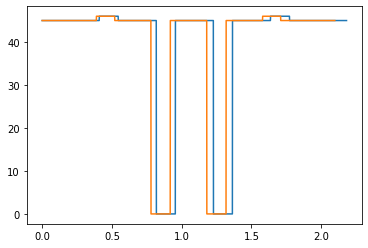

In [10]:
midi_data = pm.PrettyMIDI(path + midi_file)
v1 = Visualizer(midi_data)
midi_data = pm.PrettyMIDI(path_save + midi_file[:-4]+"_note_tuple.mid")
v2 = Visualizer(midi_data)



t1, p1, l1 = v1.get_time_f0_loudness()
t2, p2, l2 = v2.get_time_f0_loudness()

plt.plot(t1, p1[0], label = "original")
plt.plot(t2, p2[0], label = "reconstruct")
plt.show()

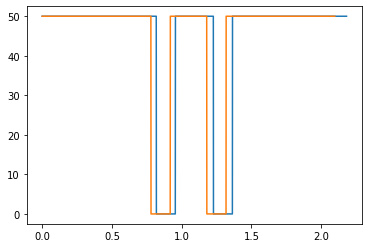

In [11]:
plt.plot(t1, l1[0], label = "original")
plt.plot(t2, l2[0], label = "reconstruct")
plt.show()

We observe slight time variations -> due to time quantification for note tuple.
It can be corrected by stretching time (considering quantification error is uniform).

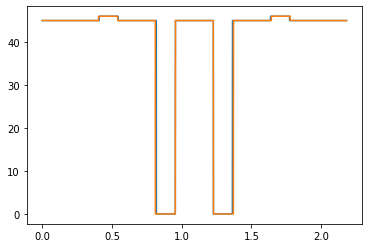

In [12]:
ratio = t1[-1]/t2[-1]
t_reconst_adapt = t2 *ratio 

plt.plot(t1, p1[0], label = "original")
plt.plot(t_reconst_adapt, p2[0], label = "reconstruct")
plt.show()

### F0 and Loudness vectors from Midi Like

In [13]:
midi_like_seq


SET_VELOCITY<50.0>
NOTE_ON<45>
TIME_SHIFT<0.1363635>
NOTE_OFF<45.0>
NOTE_ON<45>
TIME_SHIFT<0.1363635>
NOTE_OFF<45.0>
NOTE_ON<45>
TIME_SHIFT<0.13636350000000003>
NOTE_OFF<45.0>
NOTE_ON<46>
TIME_SHIFT<0.13636349999999997>
NOTE_OFF<46.0>
NOTE_ON<45>
TIME_SHIFT<0.13636350000000008>
NOTE_OFF<45.0>
NOTE_ON<45>
TIME_SHIFT<0.13636349999999997>
NOTE_OFF<45.0>
TIME_SHIFT<0.13636349999999997>
NOTE_ON<45>
TIME_SHIFT<0.13636349999999997>
NOTE_OFF<45.0>
NOTE_ON<45>
TIME_SHIFT<0.13636350000000008>
NOTE_OFF<45.0>
TIME_SHIFT<0.13636350000000008>
NOTE_ON<45>
TIME_SHIFT<0.13636349999999986>
NOTE_OFF<45.0>
NOTE_ON<45>
TIME_SHIFT<0.13636350000000008>
NOTE_OFF<45.0>
NOTE_ON<46>
TIME_SHIFT<0.13636350000000008>
NOTE_OFF<46.0>
NOTE_ON<45>
TIME_SHIFT<0.13636349999999986>
NOTE_OFF<45.0>
NOTE_ON<45>
TIME_SHIFT<0.13636350000000008>
NOTE_OFF<45.0>
NOTE_ON<45>
TIME_SHIFT<0.13636349999999986>
NOTE_OFF<45.0>

In [14]:
frame_rate = 16000
pitch, loudness, t = midi_like_seq.get_f0_loudness_time(frame_rate)

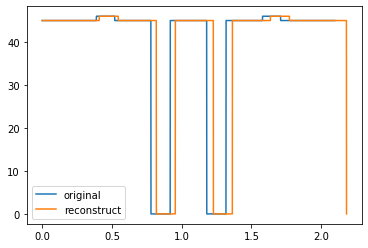

In [15]:
plt.plot(t2, p2[0], label = "original")
plt.plot(t, pitch, label = "reconstruct")
plt.legend()
plt.show()

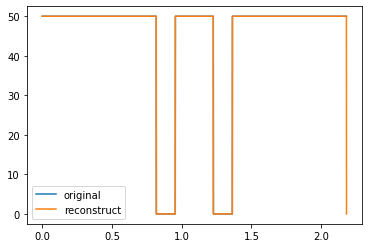

In [16]:
plt.plot(t1, l1[0], label = "original")
plt.plot(t,  loudness, label = "reconstruct")
plt.legend()
plt.show()

## Reconstruction between f0 loudness from midi and f0 loudness from midi-like file 

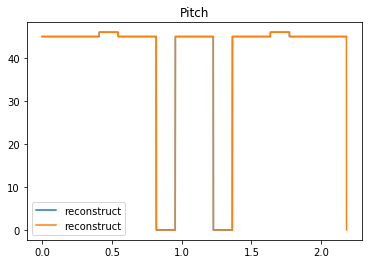

In [17]:
midi_data = pm.PrettyMIDI(path_save + midi_file[:-4]+"_midi_like.mid")
v2 = Visualizer(midi_data)
t2, p2, l2 = v2.get_time_f0_loudness()

plt.plot(t2, p2[0], label = "reconstruct")
plt.plot(t, pitch, label = "reconstruct")
plt.legend()
plt.title("Pitch")
plt.show()

In [18]:
print(t2.shape)
print(t.shape)

(4363,)
(34909,)
